                                        PROJECT 1
        Plotting the the time evolution wave function for a free particle 


In [32]:
using Printf
using Statistics
using Plots
using SparseArrays: spdiagm
using LinearAlgebra
using Polynomials

dx=0.1
dt=0.5
L=10
m=1 #  mass
P=500 # time step points 
T=2000
# h_bar=1e-3

x=collect(-L:dx:L)
# t=collect(0:dt:T)
J=length(x)
# m= length(t)




201

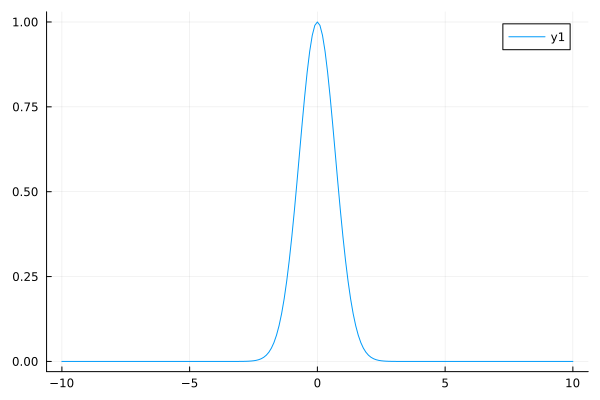

In [33]:
# Defining the gaussian  function
function f(x)
    return exp(-x^2)
end

plot(x,f.(x)) #Ploting the function

In [34]:
#  Taking the absolute value of it.
function prob_dens(x)
    return(f(x)^2)
end

prob_dens (generic function with 1 method)

Defining simpson(1/3) function for integration

In [35]:

function simpson(func,a,b,N)
    h=(b-a)/(N-1)
    sum= (func(a)+func(b))

    for i=1:2:N-1
        sum += 4*func(a+ i*h)
    end
    
    for i=2:2:N-2
        sum += 2*func(a+ i*h)
    end
    return h*(sum)/3
end



simpson (generic function with 1 method)

In [36]:
N=simpson(prob_dens,-10,10,1001)

#  The value is accuarate till 13th place


1.2533141373155001

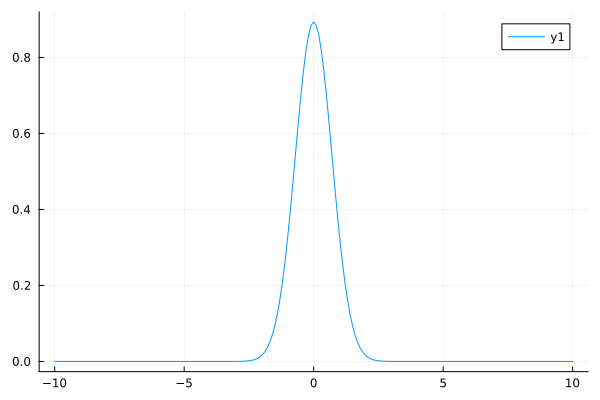

In [37]:
#plotting normalised wavefunction

function norm_psi(x)
    return f(x)/(N^(.5))
end
plot(x,norm_psi.(x))
# size(norm_psi.(x))

Plotting 1st order derivative of gaussian wave function

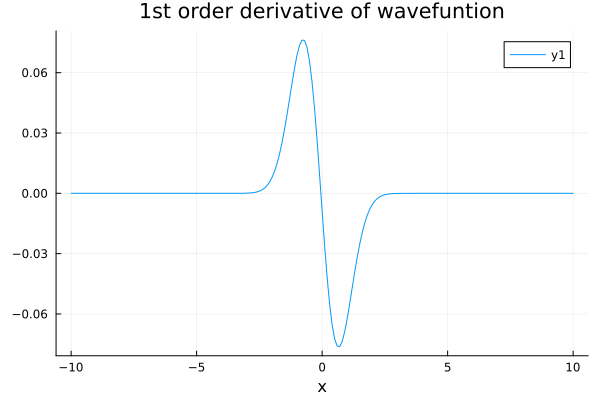

In [38]:
D_1= spdiagm(J,J, 1 => ones(J-1), 0=>ones(J)*-1)
plot(x,D_1*norm_psi.(x),xlabel='x', title="1st order derivative of wavefuntion")

Plotting 2nd order derivative of gaussian  wave function

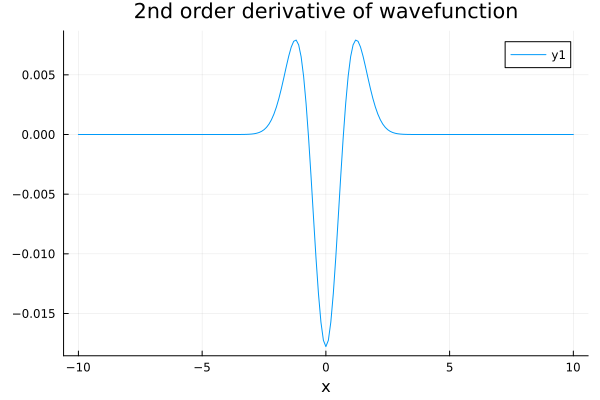

In [39]:

D_2=spdiagm(J,J, 1=> ones(J-1) ,0=> ones(J)*-2, -1=>ones(J-1))
plot(x,D_2*norm_psi.(x),xlabel='x', title="2nd order derivative of wavefunction")

In [40]:
#defining wavefunctions with momentum k=20
psi1=@.exp(-(1im*20*x)*exp(-(x-4)^2))   #  gaussian
prob1=conj(psi1).*(psi1)
psi2= @.exp(-(1im*20*x)*sin(pi*x/2*L))     # sinusodial


201-element Vector{ComplexF64}:
                 1.0 - 1.964386723728472e-13im
 -0.9968285949694307 - 0.07957859166428352im
                 1.0 + 2.305508619323373e-12im
   0.711795928940826 + 0.7023863292684921im
                 1.0 + 1.1286344900942007e-12im
 0.06630685835171127 + 0.9977992786806003im
                 1.0 + 9.216326031168812e-13im
 -0.7984780389030323 + 0.6020239375552833im
                 1.0 + 2.3439396845969043e-12im
  0.9775332947055968 - 0.21078106590019152im
                 1.0 - 3.524754451252659e-13im
 -0.4794387656291727 - 0.8775753358042688im
                 1.0 - 1.5527439486158423e-12im
                     ⋮
 -0.4794387656291727 - 0.8775753358042688im
                 1.0 - 3.524754451252659e-13im
  0.9775332947055968 - 0.21078106590019152im
                 1.0 + 2.3439396845969043e-12im
 -0.7984780389030323 + 0.6020239375552833im
                 1.0 + 9.216326031168812e-13im
 0.06630685835171127 + 0.9977992786806003im
                 1.0 + 1.128

Time evolution
AX(t+dt)=BX(t)

In [41]:
A=Matrix(1I,J,J)+(1im/2)*dt*D_2
B=Matrix(1I,J,J)-(1im/2)*dt*D_2
C=inv(A)

201×201 Matrix{ComplexF64}:
      0.789473+0.359281im      …  -7.50541e-134-1.32117e-133im
      0.141821-0.123546im          3.78362e-133-5.64451e-133im
    -0.0116456-0.039088im          3.08958e-132+5.16662e-133im
   -0.00876074-0.00121241im        3.73416e-132+1.39561e-131im
   -0.00102618+0.00162019im       -5.14457e-131+4.23322e-131im
   0.000227602+0.000348062im   …  -2.75954e-130-1.35075e-130im
    8.91397e-5-1.36584e-5im        3.98354e-131-1.4163e-129im
    5.31081e-6-1.88202e-5im        6.02082e-129-2.53818e-129im
   -3.23748e-6-2.73862e-6im        2.21545e-128+2.04232e-128im
   -8.31308e-7+3.92993e-7im       -4.34046e-128+1.32003e-127im
    2.89599e-9+1.99372e-7im    …  -6.36975e-127+6.99637e-128im
    3.96099e-8+1.73361e-8im        -1.5104e-126-2.53997e-126im
    6.97937e-9-6.2606e-9im         7.77607e-126-1.11915e-125im
              ⋮                ⋱               ⋮
  -1.5104e-126-2.53997e-126im        3.96099e-8+1.73361e-8im
 -6.36975e-127+6.99637e-128im  …     2.89599

In [42]:
#y=prob_dens_new(x)

In [43]:

psi_matrix = psi1
psi_prev = psi1
for i in 0:dt:T
    psi_forward = C*B*psi_prev
    psi_matrix = hcat(psi_matrix,psi_forward)
    psi_prev = psi_forward
end
prob_matrix = abs2.(psi_matrix)




201×4002 Matrix{Float64}:
 1.0  0.828806  0.46565   0.188929  …  0.103456   0.0318775  0.0074413
 1.0  1.13239   1.30144   1.16032      0.113247   0.235307   0.280043
 1.0  1.0395    1.21527   1.50722      0.327756   0.0101552  0.176561
 1.0  1.00123   1.03097   1.17597      1.3945     1.50327    0.814313
 1.0  0.998381  0.99078   0.990273     1.05976    1.27424    1.69978
 1.0  0.999652  0.995881  0.979874  …  1.3307     0.911883   0.696536
 1.0  1.00001   0.999747  0.99613      0.646415   0.802504   0.873519
 1.0  1.00002   1.00021   1.00079      0.544633   0.660652   0.868108
 1.0  1.0       1.00006   1.00048      0.544878   0.542276   0.256952
 1.0  1.0       0.999999  1.00005      0.0556331  0.10105    0.552343
 1.0  1.0       0.999997  0.999977  …  0.0926582  0.483026   0.648276
 1.0  1.0       0.999999  0.999992     0.777534   0.401804   0.100471
 1.0  1.0       1.0       1.0          0.56356    0.523591   0.196769
 ⋮                                  ⋱             ⋮          
 1

In [44]:
@gif for i ∈ 1:size(prob_matrix)[2]
   plot(x,prob_matrix[:,i])
    ylims!(0,1)
end

[ Info: Saved animation to c:\Users\shubham\Desktop\sem4\pyl800\tmp.gif


Collecting coefficients of 2nd order derivative 

In [ ]:
function Coefficients(r)
    M = zeros(r,r)
    for i =1:r
        for j =1:r
            M[i,j] = 2 * (i)^(2*j) / factorial(2*j)
        end
    end  
    Mi=M^-1;
    colm=Mi*ones(r)*(-2);
    ck =Mi[1,:];
    return cat(colm[1],ck,dims=1) #k=0 first
    end

Coefficients (generic function with 1 method)

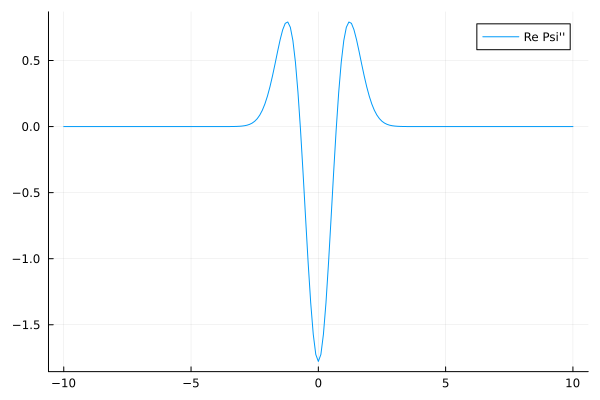

In [ ]:
r=1
c=Coefficients(r)

# Defining the second order derivative matrix
coeff=[c[abs(i)+1]*ones(J-abs(i)) for i=-r:r ] 
pos=collect(-r:r)
D2=spdiagm(J,J,(pos.=>coeff)...)/(dx^2)

D2Psi = D2*norm_psi.(x)
plot(x,real.(D2Psi);label="2nd order derivative")


Plotting the time evolution using pade approximation

In [ ]:
# Defining M in [M/M] Pade approximant of the exponential function

function roots_Pade(M)
    X = zeros(M,M)
    B = zeros(1,M)
    A = zeros(M,1)
    for i = 1:M
        m = M + i 
        A[i,1] = -1/factorial(m) 
        for j = 1:M
            m = m - 1
            X[i,j] = 1/(factorial(m))
        end
    end
    B = inv(X)*A;
    
    Poly = Polynomial([1;B], :z)
    R = roots(Poly);
    R = -conj(R)
    return R
end

roots_Pade (generic function with 1 method)

In [ ]:
M = 1 # Defining value of M in Pade approximation
roots_list = roots_Pade(M)

1-element Vector{Float64}:
 -2.0

Plotting time evolution for gaussian wave function

In [ ]:
#using pade approximation 
#pot=@. x^2 #Harmonic oscillator
h=1
pot=zeros(J)
V=spdiagm(J,J,0=> pot)

b = 1im*dt/(2*m)

PSI = zeros(J,P)
PSI = complex(PSI)
PSI[:,1] = psi1

for i=2:P
    for s=1:M
        # Defining A and Aconj
        A      = I(J) + (b/roots_list[s])*D2 -((1im*dt/h)/roots_list[s])*V
        Aconj  = conj(A)
        
        # Finding Psi(n+1)
        rhs = Aconj*psi1
        sol = A\rhs
        psi1 = sol
    end
    PSI[:,i] = psi1
end

[ Info: Saved animation to c:\Users\shubham\Desktop\sem4\pyl800\Wavefunc_evol.gif


Plots.AnimatedGif("c:\\Users\\shubham\\Desktop\\sem4\\pyl800\\Wavefunc_evol.gif")
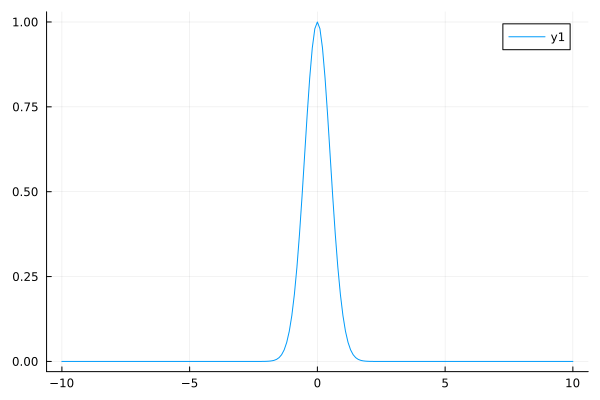

In [ ]:
anim=@animate for i = 1:P
       plot(x,real.(conj(PSI[:,i]).*PSI[:,i]))
      # ylims!(0,1)
     end
     gif(anim, "Wavefunc_evol.gif", fps = 50)

Plotting time evolution for sinusodial wave function

In [ ]:
h=1
pot=zeros(J)
V=spdiagm(J,J,0=> pot)

b = 1im*dt/(2*m)

PSI = zeros(J,P)
PSI = complex(PSI)
PSI[:,1] = psi2

for i=2:P
    for s=1:M
        # Defining A and Aconj
        A      = I(J) + (b/roots_list[s])*D2 -((1im*dt/h)/roots_list[s])*V
        Aconj  = conj(A)
        
        # Finding Psi(n+1)
        rhs = Aconj*psi2
        sol = A\rhs
        psi1 = sol
    end
    PSI[:,i] = psi2
end

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\src\ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\shubham\.julia\packages\PlotUtils\M092a\

Plots.AnimatedGif("c:\\Users\\shubham\\Desktop\\sem4\\pyl800\\Wavefunc_evol.gif")
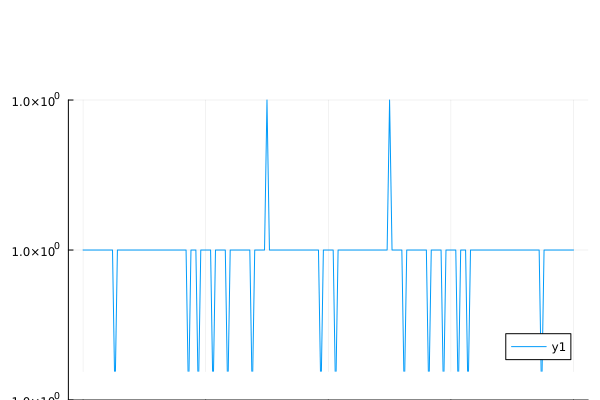

In [ ]:
anim=@animate for i = 1:P
    plot(x,real.(conj(PSI[:,i]).*PSI[:,i]))
   # ylims!(0,1)
  end
  gif(anim, "Wavefunc_evol.gif", fps = 50)